In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import scipy
import scipy.signal
import time
%matplotlib notebook

In [3]:
fs = 44100

In [4]:
t = np.arange(int(fs*20e-3))/fs

In [5]:
chirp = scipy.signal.chirp(t, 1e3, 20e-3, 1e3)

In [ ]:
plt.plot(t, chirp)

In [ ]:
while True:
    play(chirp, 1)

In [7]:
import sonar
import queue
import math

In [8]:
def lcm(a, b):
    return abs(a*b) // math.gcd(a, b)

In [ ]:
fs= 44100
f = 440;
duration = lcm(fs,f)
duration = 44100*10
t = np.arange(duration)/fs
data =0.5* np.sin(2*np.pi*f*t)
#data = np.bartlett(len(data))*data
print('duration: ', duration/fs)
play(out,data)

In [41]:

p = pyaudio.PyAudio() #instantiate PyAudio


In [42]:
def show_devices(audio):
    # audio = pyaudio.PyAudio()
    for i in range(audio.get_device_count()):
        print (i, audio.get_device_info_by_index(i))

In [43]:
show_devices(p)

0 {'index': 0, 'structVersion': 2, 'name': 'Display Audio', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.008854166666666666, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.0181875, 'defaultSampleRate': 48000.0}
1 {'index': 1, 'structVersion': 2, 'name': 'MacBook Air Microphone', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.04850340136054422, 'defaultLowOutputLatency': 0.01, 'defaultHighInputLatency': 0.05866213151927438, 'defaultHighOutputLatency': 0.1, 'defaultSampleRate': 44100.0}
2 {'index': 2, 'structVersion': 2, 'name': 'MacBook Air Speakers', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.02215419501133787, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.03231292517006803, 'defaultSampleRate': 44100.0}


In [44]:
out = p.open(format=pyaudio.paFloat32, channels=2, rate=int(fs),output=True,output_device_index=0)


In [45]:
def play(out, data, reps=1):
    for i in range(reps):
        out.write( data.astype(np.float32).tobytes() )


In [52]:
fs= 44100
f = 4400;
CH = 1
def build_chirp(f1, f2):
    global fs, CH
    duration = lcm(fs,f)
    duration = fs/10
    t = np.arange(duration)/fs
    chirp = 0.75 * scipy.signal.chirp(t, f1, 100e-3, f2, phi=0)
    # chirp = np.hstack([chirp, chirp[::-1]])
    # data =0.5* np.sin(2*np.pi*f*t)
    # chirp = np.bartlett(len(chirp))*chirp
    print('duration: ', duration/fs)
    stereo_signal = np.zeros([len(chirp), 2])   #these two lines are new
    stereo_signal[:, CH] = chirp[:]     #1 for right speaker, 0 for  left
    return stereo_signal
chirp = build_chirp(17e3, 18e3)
chirp2 = build_chirp(19e3, 20e3)

# out = p.open(format=pyaudio.paFloat32, channels=2, rate=int(fs),output=True,output_device_index=2)
# play(out, chirp)

duration:  0.1
duration:  0.1


True
in_data 88200 22050 {'input_buffer_adc_time': 16905.0425125315, 'current_time': 16905.61105125, 'output_buffer_dac_time': 0.0} 0


<IPython.core.display.Javascript object>


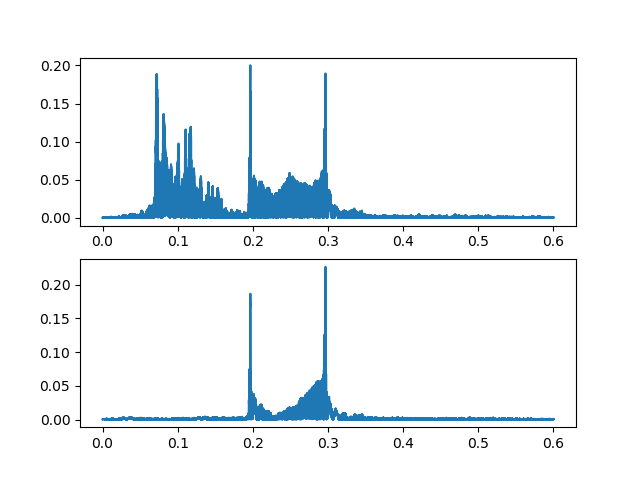

8674


In [57]:
FORMAT=pyaudio.paFloat32
CHANNELS = 1
RATE = fs
CHUNK=RATE//2


def callback(in_data, frame_count, time_info, status):
    global data
    print('in_data', len(in_data), frame_count, time_info, status)
    data = np.frombuffer(in_data, dtype=np.float32)
    return (None, pyaudio.paComplete)

play(out,chirp)

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,            
                input_device_index=1,
                stream_callback=callback,
                frames_per_buffer=CHUNK)
print(stream.is_active())
# time.sleep(0)
while stream.is_active():
   time.sleep(0.05)
stream.close()
plt.figure(2)
plt.clf()
plt.subplot(211)
#plt.plot(data)
xcorr = np.correlate(data, chirp[:, ch], 'full')
t = np.arange(len(xcorr))/fs
plt.plot(t, np.abs(xcorr))    
print(np.argmax(np.abs(xcorr)))
plt.subplot(212)
#plt.plot(data)
xcorr2 = np.correlate(data, chirp2[:,ch], 'full')
t = np.arange(len(xcorr2))/fs
plt.plot(t, np.abs(xcorr2))    

In [ ]:
plt.show()

In [48]:
plt.plot(xcorr-xcorr2)

In [49]:
plt.clf()
plt.plot(chirp)
plt.plot(chirp2)

In [ ]:
f1=17e3
f2=18e3
t = np.arange(44100/50)/fs
chirp = 0.5 * scipy.signal.chirp(t, f1, 20e-3, 17e3, phi=-90)

In [ ]:
np.hstack([chirp, chirp[::-1]])

In [122]:
b, a = scipy.signal.butter(5, 0.25)
zi = scipy.signal.lfilter_zi(b, a)
y, zo = scipy.signal.lfilter(b, a, np.ones(10), zi=zi)

In [123]:
zi

array([ 0.99672078, -1.49409147,  1.28412268, -0.45244173,  0.07559489])

In [124]:
b

array([0.00327922, 0.01639608, 0.03279216, 0.03279216, 0.01639608,
       0.00327922])

In [125]:
a

array([ 1.        , -2.47441617,  2.81100631, -1.70377224,  0.54443269,
       -0.07231567])